In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns

%matplotlib inline

In [2]:
concrete_data = pd.read_csv('concrete.csv', encoding='UTF-8')
concrete_data.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
671,289.0,0.0,0.0,192.0,0.0,913.2,895.3,3,11.65
252,153.0,239.0,0.0,200.0,6.0,1002.0,684.0,28,26.86
308,290.4,0.0,96.2,168.1,9.4,961.2,865.0,14,34.67
10,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35
528,261.0,100.0,78.0,201.0,9.0,864.0,761.0,28,32.40
496,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100,46.23
754,254.0,0.0,0.0,198.0,0.0,968.0,863.0,365,29.79
423,284.0,15.0,141.0,179.0,5.5,842.0,801.0,56,44.52
339,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90,47.78
730,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,100,50.08


In [3]:
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
concrete_data_corr_pearson = concrete_data.corr(method='pearson')
concrete_data_corr_pearson

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [9]:
concrete_data_corr_spearman = concrete_data.corr(method='spearman')
concrete_data_corr_spearman

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640,0.477614
slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581,0.164105
ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801,-0.077830
water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942,-0.308414
superplastic,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525,0.347786
coarseagg,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928,-0.183542
fineagg,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362,-0.179962
age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000,0.596028
strength,0.477614,0.164105,-0.077830,-0.308414,0.347786,-0.183542,-0.179962,0.596028,1.000000


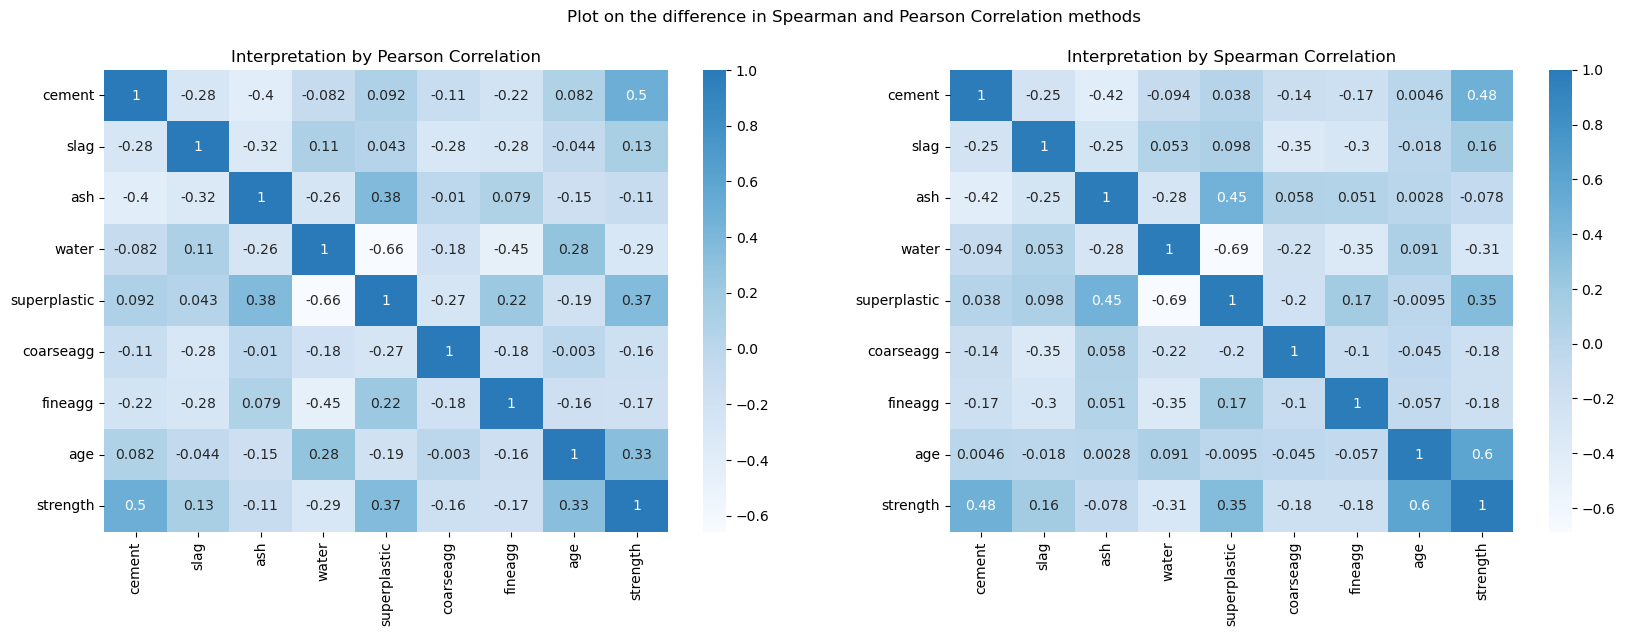

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.heatmap(concrete_data_corr_pearson, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Pearson Correlation')
plt.subplot(1, 2, 2)
sns.heatmap(concrete_data_corr_spearman, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Spearman Correlation')
plt.suptitle('Plot on the difference in Spearman and Pearson Correlation methods')
plt.show()

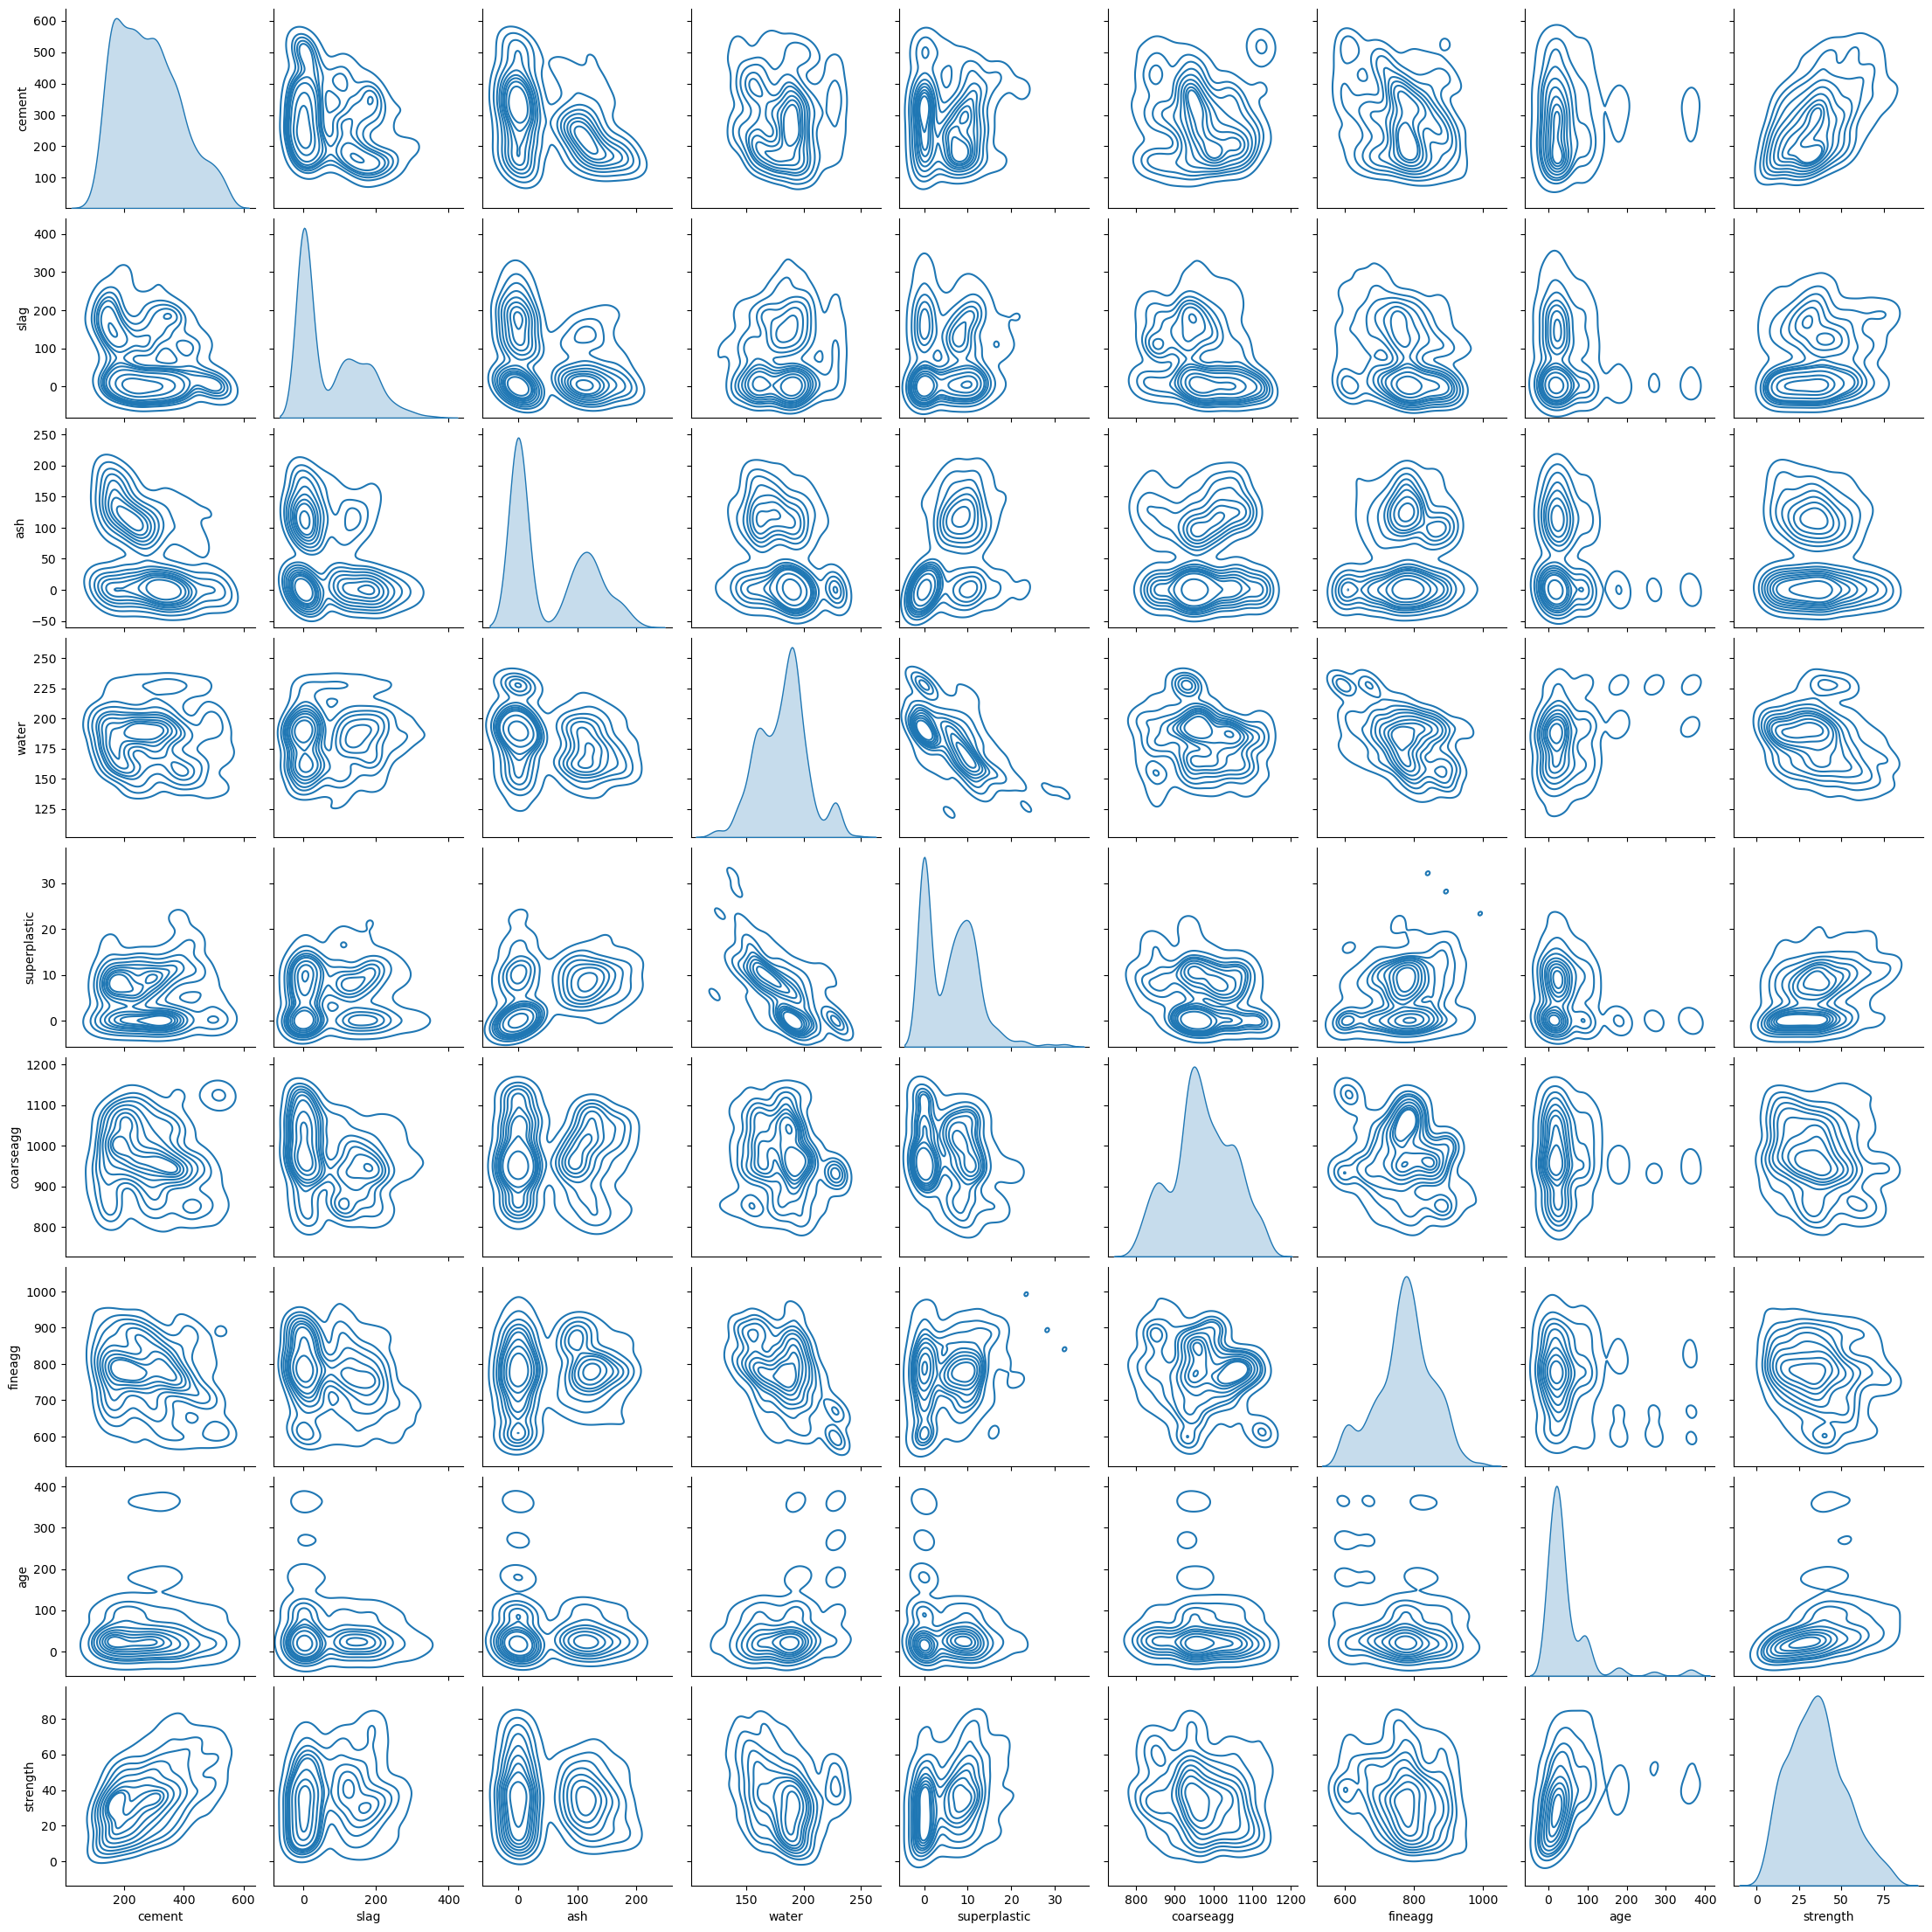

In [11]:
sns.pairplot(data=concrete_data, kind='kde', palette='stregth')
plt.show()

Text(1, 400, 'text here')

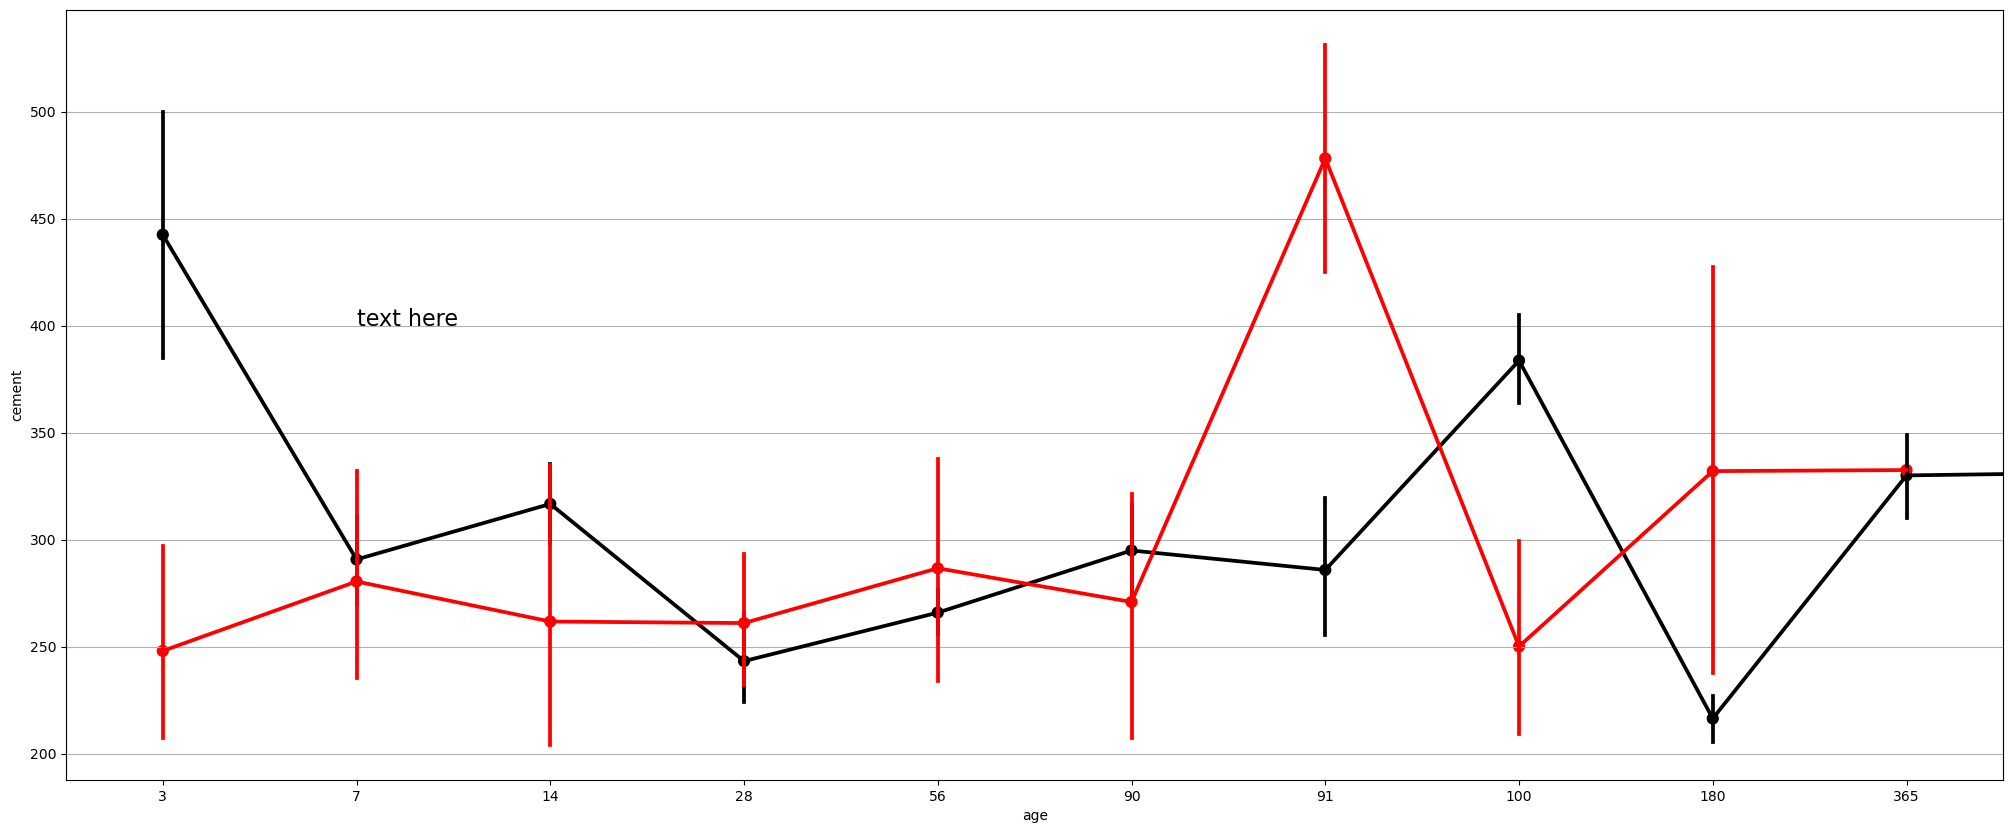

In [12]:
fig, ax1 = plt.subplots(figsize=(25, 10))
plt.grid()

sns.pointplot(data=concrete_data.iloc[100:, :200], x='age', y='cement', color='black', alpha=0.8)
sns.pointplot(data=concrete_data[:100], x='age', y='cement', color='red', alpha=0.8)

plt.text(1, 400, 'text here', fontsize=16)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale_data = StandardScaler()